In [3]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [4]:
tokenizer = Tokenizer()

data = open('PanTadeusz_k1.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'i': 1, 'w': 2, 'z': 3, 'siä™': 4, 'na': 5, 'nie': 6, 'do': 7, 'a': 8, 'jak': 9, 'ĺľe': 10, 'po': 11, 'to': 12, 'o': 13, 'od': 14, 'bo': 15, 'tak': 16, 'pan': 17, 'za': 18, 'nim': 19, 'byĺ‚': 20, 'juĺľ': 21, 'on': 22, 'lecz': 23, 'sä™dzia': 24, 'co': 25, 'przed': 26, 'domu': 27, 'jego': 28, 'gdy': 29, 'przy': 30, 'ĺ»e': 31, 'ale': 32, 'wiä™c': 33, 'go': 34, 'sam': 35, 'u': 36, 'by': 37, 'tadeusz': 38, 'byĺ‚o': 39, 'bez': 40, 'jest': 41, 'rzekĺ‚': 42, 'tylko': 43, 'miaĺ‚': 44, 'choä‡': 45, 'gdzie': 46, 'we': 47, 'mu': 48, 'dla': 49, 'wszyscy': 50, 'widaä‡': 51, 'jako': 52, 'przez': 53, 'goĺ›ci': 54, 'teraz': 55, 'kiedy': 56, 'podkomorzy': 57, 'mĺ‚odzieĺľ': 58, 'tam': 59, 'ja': 60, 'pod': 61, 'tuĺľ': 62, 'byĺ‚a': 63, 'jej': 64, 'ze': 65, 'strony': 66, 'tym': 67, 'teĺľ': 68, 'oczy': 69, 'nigdy': 70, 'koĺ„cu': 71, 'ma': 72, 'woĺşny': 73, 'nas': 74, 'nad': 75, 'wszystko': 76, 'mniej': 77, 'tu': 78, 'byĺ‚y': 79, 'aĺľ': 80, 'znowu': 81, 'wojski': 82, 'tadeusza': 83, 'căłĺľ': 84, 'sä…': 85, '

In [5]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
181/181 [==============================] - 22s 53ms/step - loss: 7.8214 - accuracy: 0.0251
Epoch 2/100
181/181 [==============================] - 10s 55ms/step - loss: 7.3167 - accuracy: 0.0311
Epoch 3/100
181/181 [==============================] - 10s 55ms/step - loss: 7.0649 - accuracy: 0.0273
Epoch 4/100
181/181 [==============================] - 10s 54ms/step - loss: 6.8199 - accuracy: 0.0329
Epoch 5/100
181/181 [==============================] - 9s 52ms/step - loss: 6.5399 - accuracy: 0.0375
Epoch 6/100
181/181 [==============================] - 10s 55ms/step - loss: 6.1848 - accuracy: 0.0396
Epoch 7/100
181/181 [==============================] - 9s 52ms/step - loss: 5.7659 - accuracy: 0.0467
Epoch 8/100
181/181 [==============================] - 9s 52ms/step - loss: 5.3113 - accuracy: 0.0586
Epoch 9/100
181/181 [==============================] - 9s 52ms/step - loss: 4.8628 - accuracy: 0.0799
Epoch 10/100
181/181 [==============================] - 9s 50ms/step - loss: 

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

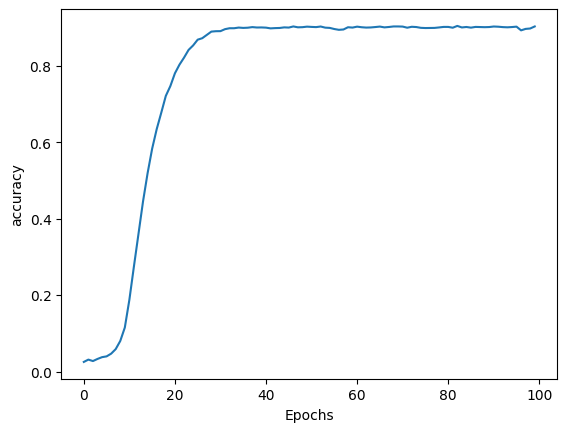

In [11]:
plot_graphs(history, 'accuracy')

In [12]:
seed_text = "Psy poszły w las"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 41ms/step
Psy poszły w las gospodarza w stodoĺ‚ä™ na siano zwyciä™stwo i zabor wracaĺ‚o do dworu wzory smugăłw smugăłw zabieraä‡ gronie go dworze zabieraä‡ wstä…g niedĺşwiedĺş ramieniu ramieniu caĺ‚owaĺ‚ westchnieĺ„ kraty zapowiedziaĺ‚ imionami ĺľe sä…siadka myĺ›liwskiem zabieraä‡ rodzicăłw wrăłcone wrăłcone majora srebrnych smugăłw lub goĺ›ci zginä…ĺ‚ prä™dko litwie jako po szubie no daleko i po szubie czekajä… zaĺľyĺ‚ poglä…daĺ‚ dano granicä™ gdy w tylu w tabor ĺ‚okcie ĺ‚okcie ĺ‚okcie w sieni szacie szacie po kä…dzieli poufali gedymin do dworu boru widziana francuza francuza boru wody widzi widzi gedymin domem dworu ĺ›mieszyä‡ kraty posiadĺ‚oĺ›ä‡ owa kropelkä™ srebrnych wlekä… pobladĺ‚a dano kropelkä™ wrăłcone wychowaĺ‚ ostrzem nosy folwarku
